# Capstone 3: Data Wrangling

The Aerospace Company currently produces turbojet, turbo propeller and gas turbine engines and parts for the civil aircraft industry but is looking to add a defense exports department to their business. They want to verify that expanding from civil to defense exports is a safe business move. In addition, the company only wants to focus on marketing to countries that already buy engines from US companies. They want a recomendation on who to market their products to. 

Historical data is available from the International Trade Administration of the U.S. Department of Commerce. This project will use the available data with time series forecasting to predict if defense exports for turbojet, turbo propeller and gas turbine engines and parts are going to increase. Once that is confirmed, a recommendation of what countries to focus on and their market outlooks will be delivered to the Aerospace Company.

### Initial Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

### Data Collection

In [2]:
#importing both files
exports_data_file = '../data/Exports by Year and Country.csv'
data_exports = pd.read_csv(exports_data_file)

yearly_shipments_file = '../data/Defense Aircraft and Parts Shipments(millions of dollars).csv'
data_ys = pd.read_csv(yearly_shipments_file)

In [3]:
data_exports.head()

,Year,Value,Country,HS Code
0,2010,$0,Algeria,"8411114050--TURBOJET A/C TURBINES EXC CIVIL, T..."
1,2010,$0,Algeria,"8411214050--TURBOPRPELLR A/C TBN, EX CIVIL, PO..."
2,2010,$0,Algeria,8411224050--TURBOPROPELLER A/C TBN EXCEPT CIVI...
3,2010,$0,Algeria,"8411824050--GAS TURBINE A/C TBN EXC CIVIL, OVE..."
4,2010,$0,Angola,"8411814050--GAS TURBINE A/C TBN EXC CIVIL, 500..."


In [4]:
data_ys.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,Measure
0,1992,$2719,$3496,$3018,$3433,$2916,$3515,$2894,$3125,$2968,$3213,$3275,$4453,$39025,Defense Aircraft and Parts (millions of dollars)
1,1993,$2456,$3045,$3001,$2890,$2874,$3024,$2880,$2767,$3257,$3235,$2820,$3218,$35467,Defense Aircraft and Parts (millions of dollars)
2,1994,$2471,$2698,$3046,$2614,$2506,$2829,$2504,$3007,$2828,$2802,$2837,$3322,$33464,Defense Aircraft and Parts (millions of dollars)
3,1995,$2090,$2484,$2604,$2389,$2384,$2682,$2366,$2425,$2583,$2480,$2433,$3064,$29984,Defense Aircraft and Parts (millions of dollars)
4,1996,$1881,$2268,$2790,$2164,$2313,$2687,$2003,$2713,$2921,$2394,$2564,$2995,$29693,Defense Aircraft and Parts (millions of dollars)


### Data Definition

##### For the data_exports data frame

In [5]:
#going to focus on the data_exports dataframe first
data_exports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7956 entries, 0 to 7955
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     7956 non-null   int64 
 1   Value    7956 non-null   object
 2   Country  7956 non-null   object
 3   HS Code  7956 non-null   object
dtypes: int64(1), object(3)
memory usage: 248.8+ KB


Value needs to be integer, since its US dollar amounts. HS code should be a string since I might want to manipulate it later.

In [6]:
#both '$' and ',' need to be stripped from the Value column first, then it can be changed to an integer
data_exports.Value = [re.sub('[^\d\.]', '', x) for x in data_exports.Value]
data_exports.head()

,Year,Value,Country,HS Code
0,2010,0,Algeria,"8411114050--TURBOJET A/C TURBINES EXC CIVIL, T..."
1,2010,0,Algeria,"8411214050--TURBOPRPELLR A/C TBN, EX CIVIL, PO..."
2,2010,0,Algeria,8411224050--TURBOPROPELLER A/C TBN EXCEPT CIVI...
3,2010,0,Algeria,"8411824050--GAS TURBINE A/C TBN EXC CIVIL, OVE..."
4,2010,0,Angola,"8411814050--GAS TURBINE A/C TBN EXC CIVIL, 500..."


In [7]:
data_exports = data_exports.astype({'Value':'int64', 'HS Code': 'string'})
data_exports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7956 entries, 0 to 7955
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     7956 non-null   int64 
 1   Value    7956 non-null   int64 
 2   Country  7956 non-null   object
 3   HS Code  7956 non-null   string
dtypes: int64(2), object(1), string(1)
memory usage: 248.8+ KB


In [8]:
#looks like all values are there, but will double check
print(data_exports.isna().any())

Year       False
Value      False
Country    False
HS Code    False
dtype: bool


##### For the data_ys data frame

In [9]:
#Now for the data_ys data frame
data_ys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     30 non-null     int64 
 1   Jan      30 non-null     object
 2   Feb      30 non-null     object
 3   Mar      30 non-null     object
 4   Apr      30 non-null     object
 5   May      30 non-null     object
 6   Jun      30 non-null     object
 7   Jul      30 non-null     object
 8   Aug      30 non-null     object
 9   Sep      30 non-null     object
 10  Oct      30 non-null     object
 11  Nov      30 non-null     object
 12  Dec      30 non-null     object
 13  Annual   30 non-null     object
 14  Measure  30 non-null     object
dtypes: int64(1), object(14)
memory usage: 3.6+ KB


All columns from Jan - Annual needs to be integers, since they are US dollar amounts

In [10]:
#as with the previous data frame, '$' needs to be stripped from the columns first then changed to an integer
#to keep from having to do many individual lines of code, '$' will be stripped from the whole dataframe
#the targetted columns are the only ones with this character
cols_check = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual']

for col in cols_check:
    data_ys[col] = [re.sub('[^\d\.]', '', x) for x in data_ys[col]]
    data_ys[col] = data_ys[col].astype(np.int64)

data_ys.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,Measure
0,1992,2719,3496,3018,3433,2916,3515,2894,3125,2968,3213,3275,4453,39025,Defense Aircraft and Parts (millions of dollars)
1,1993,2456,3045,3001,2890,2874,3024,2880,2767,3257,3235,2820,3218,35467,Defense Aircraft and Parts (millions of dollars)
2,1994,2471,2698,3046,2614,2506,2829,2504,3007,2828,2802,2837,3322,33464,Defense Aircraft and Parts (millions of dollars)
3,1995,2090,2484,2604,2389,2384,2682,2366,2425,2583,2480,2433,3064,29984,Defense Aircraft and Parts (millions of dollars)
4,1996,1881,2268,2790,2164,2313,2687,2003,2713,2921,2394,2564,2995,29693,Defense Aircraft and Parts (millions of dollars)


In [11]:
data_ys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     30 non-null     int64 
 1   Jan      30 non-null     int64 
 2   Feb      30 non-null     int64 
 3   Mar      30 non-null     int64 
 4   Apr      30 non-null     int64 
 5   May      30 non-null     int64 
 6   Jun      30 non-null     int64 
 7   Jul      30 non-null     int64 
 8   Aug      30 non-null     int64 
 9   Sep      30 non-null     int64 
 10  Oct      30 non-null     int64 
 11  Nov      30 non-null     int64 
 12  Dec      30 non-null     int64 
 13  Annual   30 non-null     int64 
 14  Measure  30 non-null     object
dtypes: int64(14), object(1)
memory usage: 3.6+ KB


In [12]:
#looks like all values are there, but will double check
print(data_ys.isna().any())

Year       False
Jan        False
Feb        False
Mar        False
Apr        False
May        False
Jun        False
Jul        False
Aug        False
Sep        False
Oct        False
Nov        False
Dec        False
Annual     False
Measure    False
dtype: bool


This section should now be good. Each column in the dataframe has the same number of entries, is in the correct format and is not missing any values.

### Data Cleaning

##### For the data_exports data frame

In [13]:
#Need to check that the HS code column only includes the values we need, which are all in reference to engines.

print(data_exports['HS Code'].unique())

<StringArray>
[  '8411114050--TURBOJET A/C TURBINES EXC CIVIL, THRUST LE 25 KN',
 '8411214050--TURBOPRPELLR A/C TBN, EX CIVIL, POWR NT OV 1100 KW',
    '8411224050--TURBOPROPELLER A/C TBN EXCEPT CIVIL, OV 1100 KW',
        '8411824050--GAS TURBINE A/C TBN EXC CIVIL, OVER 5000 KW',
   '8411814050--GAS TURBINE A/C TBN EXC CIVIL, 5000 KW AND UNDER',
        '8411997050--PARTS OF GAS TURBINE A/C ENG, EXC CIVIL A/C',
    '8411124050--TURBOJET A/C TURBINES EX  CIVIL, THRUST OVER 25',
 '8411917050--PARTS OF TURBOJET & TURBOPROPELLR A/C ENG,EX CIVIL']
Length: 8, dtype: string


Everything looks good. I was expecting this to be a clean dataset because of the data source. Now to look at the Year and Value columns to verify everything looks good.

In [14]:
data_exports.Year.describe()

count    7956.000000
mean     2015.500000
std         3.452269
min      2010.000000
25%      2012.750000
50%      2015.500000
75%      2018.250000
max      2021.000000
Name: Year, dtype: float64

In [15]:
data_exports.Value.describe()

count    7.956000e+03
mean     6.922574e+06
std      5.863919e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.939980e+05
max      1.627558e+09
Name: Value, dtype: float64

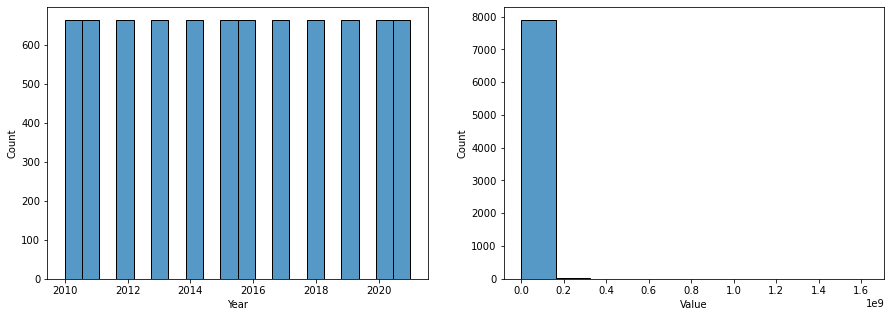

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(ax=axes[0], x = data_exports.Year)
sns.histplot(ax=axes[1], x = data_exports.Value, bins = 10)
plt.show()

There are a lot of zeros in this column, showing that many countries do not buy these defense products from the U.S.
For this situation, the company is only looking at countries that do buy these products, so any row with its 'Value' entry = 0 is going to be removed.

In [17]:
data_exports = data_exports[data_exports.Value != 0]
data_exports = data_exports.reset_index(drop = True)
data_exports.head()

,Year,Value,Country,HS Code
0,2010,2575,Comoros,8411917050--PARTS OF TURBOJET & TURBOPROPELLR ...
1,2010,2629,Belize,8411917050--PARTS OF TURBOJET & TURBOPROPELLR ...
2,2010,3286,Belarus,"8411997050--PARTS OF GAS TURBINE A/C ENG, EXC ..."
3,2010,3348,Jamaica,"8411997050--PARTS OF GAS TURBINE A/C ENG, EXC ..."
4,2010,3500,Guatemala,"8411997050--PARTS OF GAS TURBINE A/C ENG, EXC ..."


In [18]:
data_exports.Value.describe()

count    3.281000e+03
mean     1.678635e+07
std      9.040972e+07
min      2.520000e+03
25%      7.743000e+04
50%      7.043230e+05
75%      4.719542e+06
max      1.627558e+09
Name: Value, dtype: float64

This looks much better, and there are still 3281 rows in this dataframe.

##### For the data_ys data frame

In [19]:
data_ys.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2006.500000,2882.633333,3407.966667,4207.100000,3306.400000,3560.733333,4184.300000,3221.266667,3667.533333,4166.066667,3624.266667,3867.433333,4360.900000,44456.600000
std,8.803408,855.589592,968.469731,1392.428822,939.421708,1083.514363,1303.647354,942.658930,1072.460810,1336.195601,1046.030458,1072.933738,1235.913409,12825.315038
min,1992.000000,1589.000000,1800.000000,2264.000000,1799.000000,1901.000000,2050.000000,1777.000000,1779.000000,2103.000000,1914.000000,2129.000000,2436.000000,24560.000000
25%,1999.250000,2146.750000,2537.500000,3005.250000,2452.000000,2566.000000,2952.000000,2517.750000,2780.500000,2972.000000,2730.500000,2885.250000,3169.250000,33666.750000
50%,2006.500000,2797.000000,3483.000000,3989.500000,3181.500000,3488.500000,3860.000000,3160.000000,3531.500000,3891.000000,3466.000000,3853.500000,4447.000000,42562.500000
75%,2013.750000,3474.750000,4298.250000,5521.250000,4196.000000,4584.500000,5528.250000,4090.000000,4661.750000,5421.500000,4697.250000,4923.500000,5411.750000,56106.500000
max,2021.000000,4607.000000,5242.000000,6178.000000,5142.000000,5271.000000,6063.000000,4588.000000,5110.000000,6538.000000,5046.000000,5901.000000,6346.000000,62931.000000


I'm not seeing anything that needs to be done to this data frame, all is good to go.

### Saving New File

In [20]:
data_exports.to_excel('../data/Cleaned_Exports by Year and Country.xlsx', index = False)
data_ys.to_excel('../data/Cleaned_Defense Aircraft and Parts Shipments(millions of dollars).xlsx', index = False)